# Test des fonctionnalités DP_impose et K regul

In [1]:
from trustutils import run 
run.introduction("A. Gerschenfeld, Y. Gorsse")
run.description("")
run.TRUST_parameters()

## Introduction 
 Validation made by : A. Gerschenfeld, Y. Gorsse



 Report generated 26/01/2022

### Description 


### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/PolyMAC/k_regul_dp_impose/build)

In [2]:
from trustutils import run 

run.reset()
run.addCase("PolyMAC","jdd.data")  
run.addCase("CoviMAC","jdd.data")
run.printCases()
run.runCases()

### Test cases 
* PolyMAC/jdd.data : 
* CoviMAC/jdd.data : 


Running **with Sserver**...
  => A total of 2 cases were (successfully) run in 5.3s.


## Description
Domaine fermé avec une frontiere interne (en gris sur la figure), et deux surfaces permettant d'imposer les termes source testés. En bleu, la régulation sur le débit, et en orange le DP imposé. Une circulation du fluide apparait, et le débit généré se régule sur la valeur cible.

<img src="build/domaine.png">

In [3]:
run.executeScript("paste PolyMAC/jdd_P1.son PolyMAC/jdd_P2.son > PolyMAC/jdd_P1P2.son")
run.executeScript("paste CoviMAC/jdd_P1.son CoviMAC/jdd_P2.son > CoviMAC/jdd_P1P2.son")

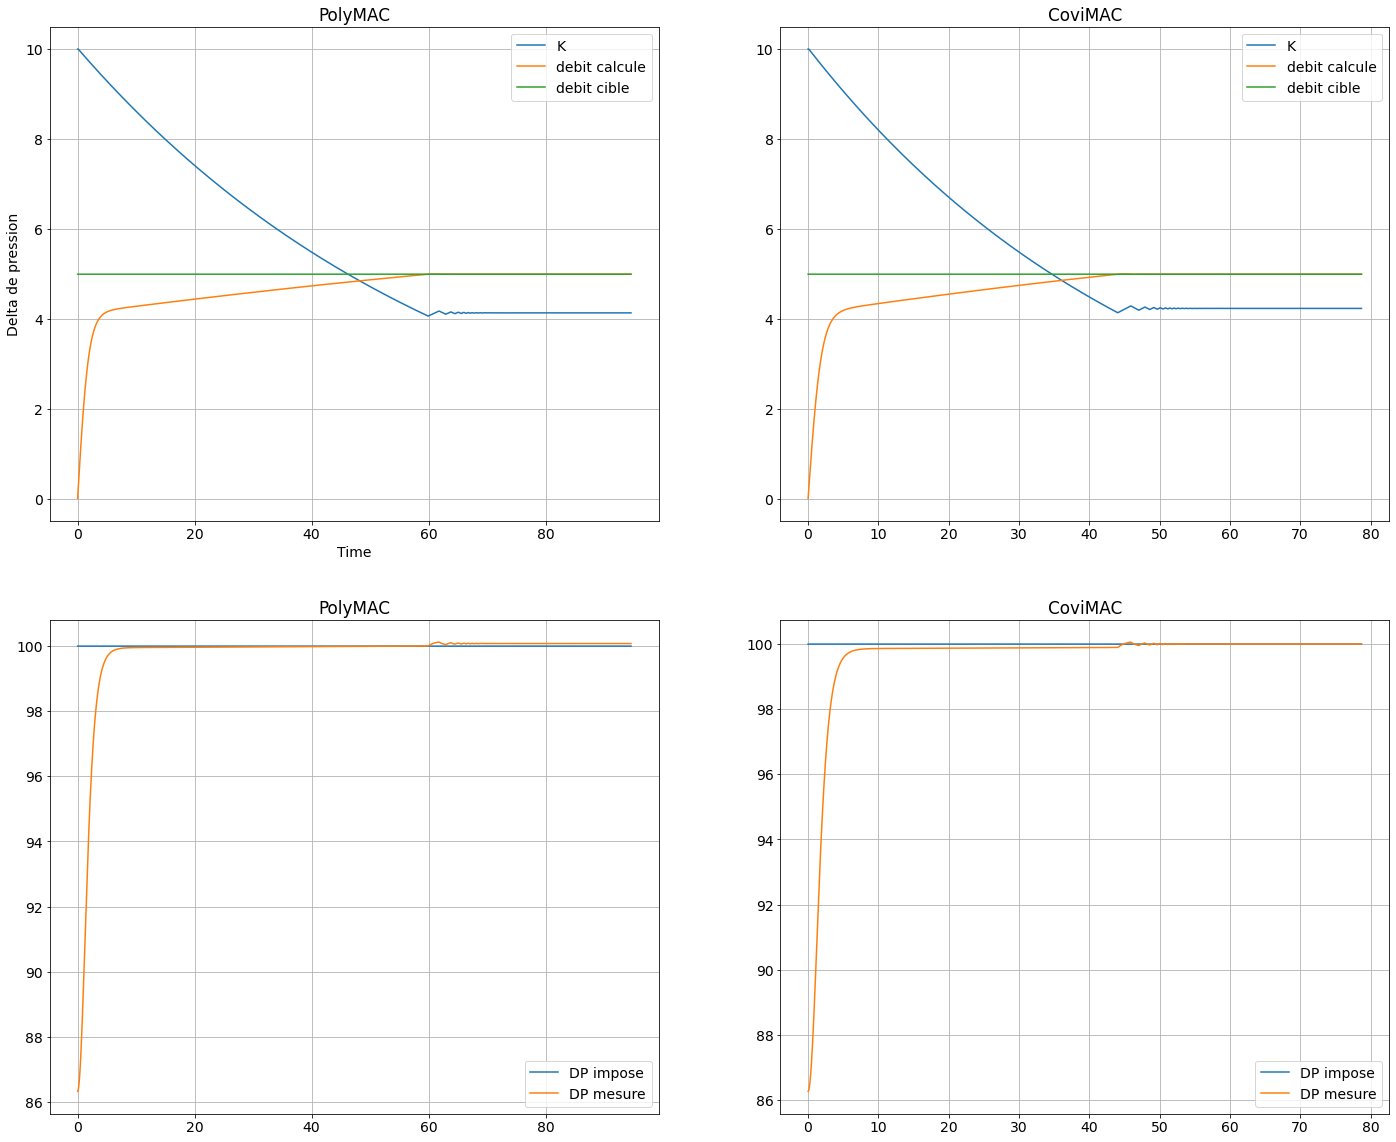

In [4]:
from trustutils.jupyter import plot
import numpy as np


Graphique=plot.Graph(nX=2,nY=2)

data=plot.loadText("./PolyMAC/jdd_pb_K_surf1.out",skiprows=3)
Graphique.add(data[0], data[1]  ,label="K",title="PolyMAC")
Graphique.add(data[0],-data[2]  ,label="debit calcule")
Graphique.add(data[0], data[3]  ,label="debit cible")  
Graphique.label("Time","Delta de pression")

Graphique.addPlot([0,1],"CoviMAC")
data=plot.loadText("./CoviMAC/jdd_pb_K_surf1.out",skiprows=3)
Graphique.add(data[0], data[1]  ,label="K")
Graphique.add(data[0],-data[2]  ,label="debit calcule")
Graphique.add(data[0], data[3]  ,label="debit cible")  

Graphique.addPlot([1,0],"PolyMAC")
data=plot.loadText("./PolyMAC/jdd_pb_DP_surf2.out",skiprows=3)
Graphique.add(data[0], data[1]  ,label="DP impose")
data=plot.loadText("./PolyMAC/jdd_P1P2.son",skiprows=5)
Graphique.add(data[0],data[1]-data[3]  ,label="DP mesure")

Graphique.addPlot([1,1],"CoviMAC")
data=plot.loadText("./CoviMAC/jdd_pb_DP_surf2.out",skiprows=3)
Graphique.add(data[0], data[1]  ,label="DP impose",title="CoviMAC")
data=plot.loadText("./CoviMAC/jdd_P1P2.son",skiprows=5)
Graphique.add(data[0],data[1]-data[3]  ,label="DP mesure")

Graphique.visu()